In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-12-04 22:54:36.543882


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = tf.constant(np.arange(-100,100,4), dtype='float32')
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]


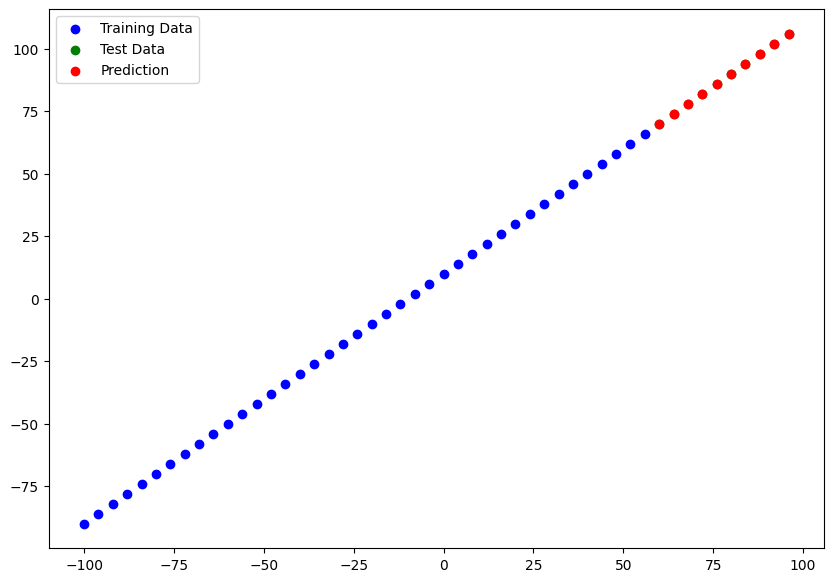

In [ ]:
def plot_prediction(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,prediction=y_test):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label,c='b', label = 'Training Data')
  plt.scatter(test_data, test_label,c='g', label = 'Test Data')
  plt.scatter(test_data, prediction,c='r', label = 'Prediction')
  plt.legend()

plot_prediction(X_train,y_train,X_test,y_test,y_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])]
)

model.compile(loss='mae', optimizer='sgd', metrics=['mae'])
#model.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


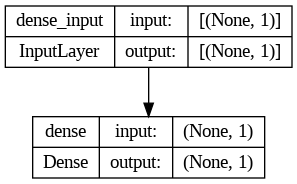

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 7.6797 - mae: 7.6797
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 9.4823 - mae: 9.4823
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 11.2659 - mae: 11.2659
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5641 - mae: 9.5641
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4743 - mae: 10.4743
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6992 - mae: 9.6992
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7943 - mae: 8.7943
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0574 - mae: 9.0574
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 19.3233 - mae: 19.3233
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 10.4280 - mae: 10.4280
Epoch 11/100
2/2 [==============================] - 0s 9ms/st

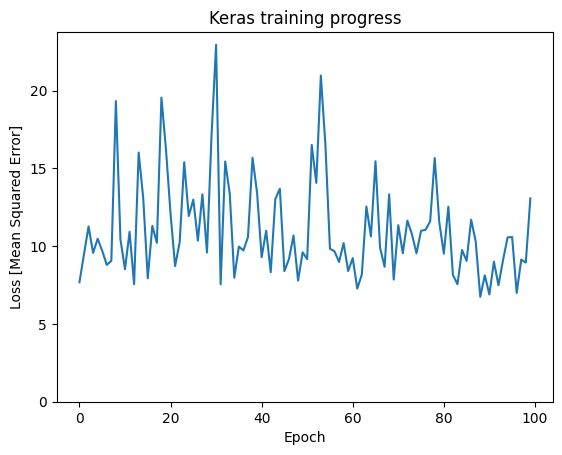

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
from statistics import mean
avg = mean(history.history['loss'])
avg

11.025703673362733

In [ ]:
max(history.history['loss'])

22.943328857421875

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 266ms/step


In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
y_pred

array([[42.876205],
       [45.646954],
       [48.4177  ],
       [51.18845 ],
       [53.959194],
       [56.729942],
       [59.50069 ],
       [62.271435],
       [65.04218 ],
       [67.812935]], dtype=float32)

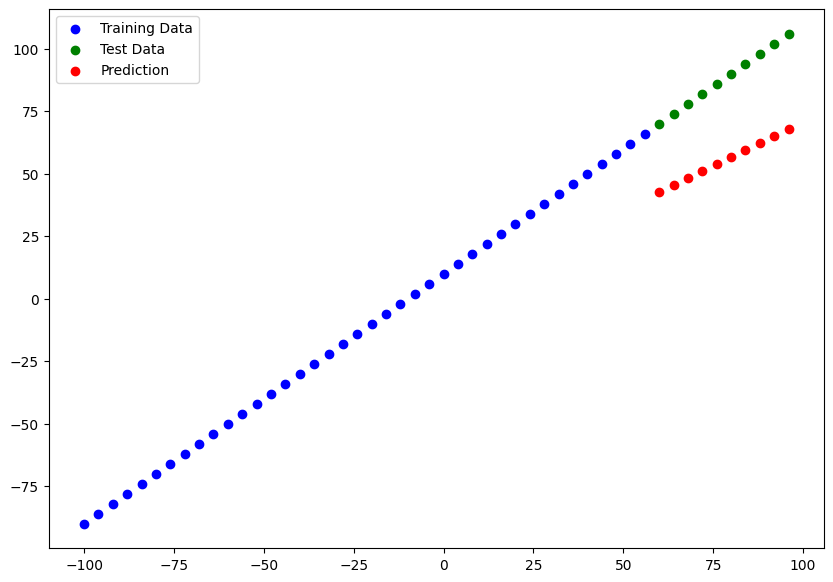

In [ ]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred)

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 375ms/step - loss: 32.6554 - mae: 32.6554


[32.655433654785156, 32.655433654785156]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred.squeeze())

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=32.655434>

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1078.8434>

In [ ]:
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=32.655434>

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(30, activation="relu", input_shape=[1]),
        tf.keras.layers.Dense(1),
    ]
)

model_2.compile(loss='mae', optimizer='sgd', metrics=['mae'])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


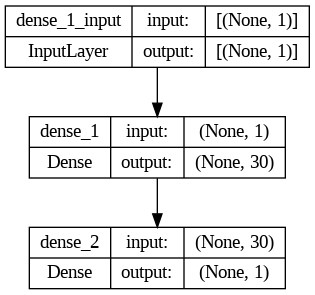

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)

In [ ]:
history2 = model_2.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 30.9747 - mae: 30.9747
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 28.4283 - mae: 28.4283
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 25.2219 - mae: 25.2219
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 11.5000 - mae: 11.5000
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 16.0830 - mae: 16.0830
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6485 - mae: 11.6485
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4731 - mae: 11.4731
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 13.4453 - mae: 13.4453
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 24.4037 - mae: 24.4037
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7413 - mae: 12.7413
Epoch 11/100
2/2 [==============================] - 0s

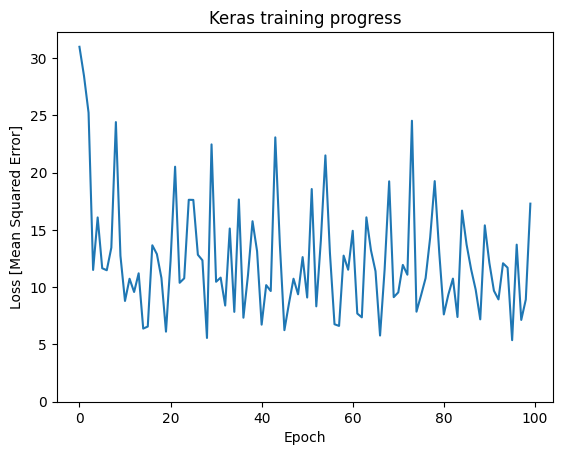

In [ ]:
plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
y_pred2 = model_2.predict(X_test)

1/1 [==============================] - 0s 217ms/step


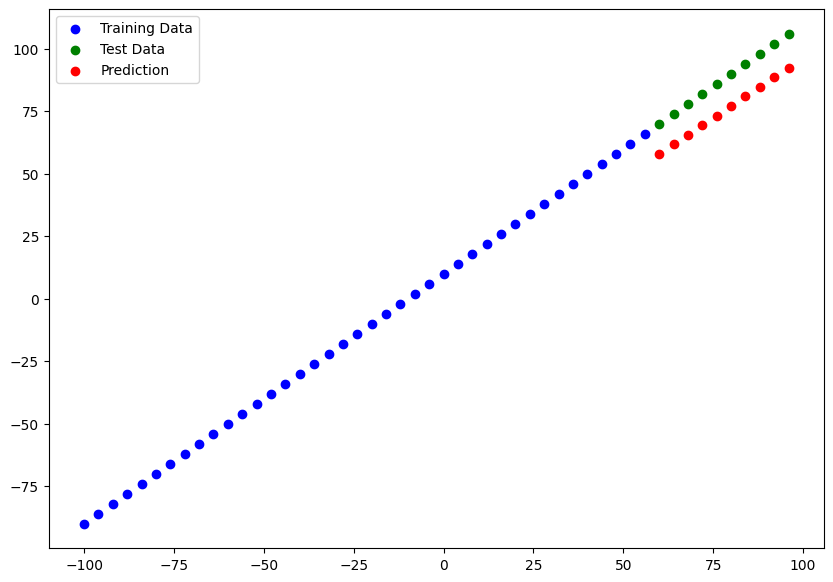

In [ ]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred2)

In [ ]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 352ms/step - loss: 12.7842 - mae: 12.7842


[12.784223556518555, 12.784223556518555]

##Regression

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
insurance_onehot = pd.get_dummies(insurance, columns =['sex','smoker','region'])
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = insurance_onehot.drop(columns=['charges'])
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y = insurance_onehot['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

In [ ]:
X_train_tf[0]

<tf.Tensor: shape=(11,), dtype=float64, numpy=
array([46.  , 19.95,  2.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ])>

In [ ]:
X_train_tf.shape,X_test_tf.shape,y_train_tf.shape,y_test_tf.shape

(TensorShape([1070, 11]),
 TensorShape([268, 11]),
 TensorShape([1070]),
 TensorShape([268]))

In [ ]:
X_train_tf.shape[1:]

TensorShape([11])

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
history_i = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 9ms/step - loss: 8513.3311 - mae: 8513.3311
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7832.2285 - mae: 7832.2285
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7600.9585 - mae: 7600.9585
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 7667.0762 - mae: 7667.0762
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7653.9663 - mae: 7653.9663
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7553.4028 - mae: 7553.4028
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7563.2988 - mae: 7563.2988
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7788.4194 - mae: 7788.4194
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7586.0586 - mae: 7586.0586
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7761.1621 - mae: 7761.1621

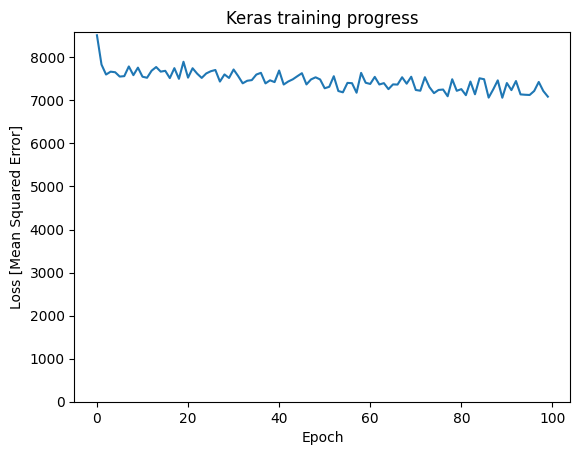

In [ ]:
plt.plot(history_i.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7003.6440 - mae: 7003.6440


[7003.64404296875, 7003.64404296875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history_i1 = insurance_model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13289.9570 - mae: 13289.9570
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13080.1855 - mae: 13080.1855
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12658.9912 - mae: 12658.9912
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11876.0781 - mae: 11876.0781
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10635.6143 - mae: 10635.6143
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9157.0059 - mae: 9157.0059
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7926.0815 - mae: 7926.0815
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7461.3418 - mae: 7461.3418
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.2754 - mae: 7400.2754
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7380.8677 - mae:

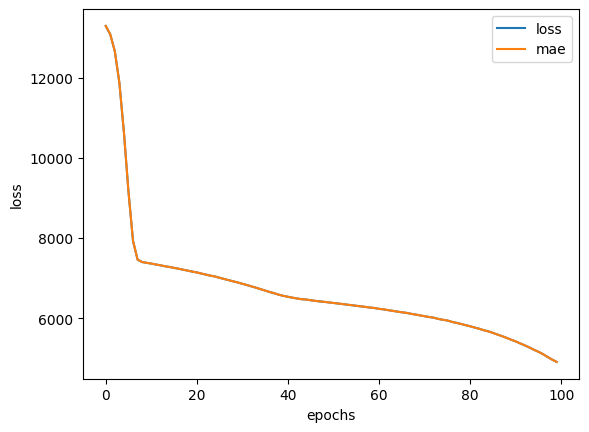

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_i1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

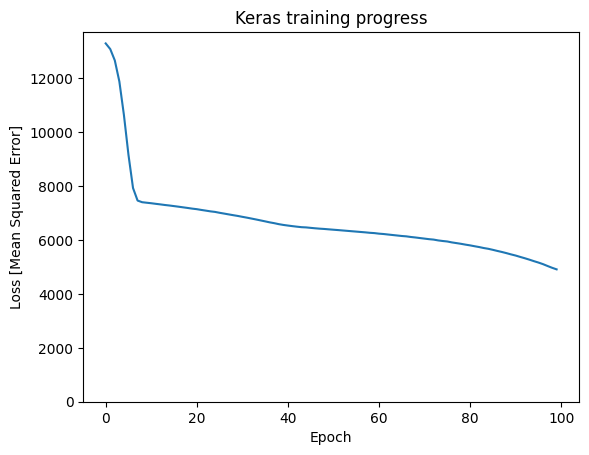

In [ ]:
plt.plot(history_i1.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
# Check the results of the insurance model
insurance_model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4781.6943 - mae: 4781.6943


[4781.6943359375, 4781.6943359375]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 100 units
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history_i2 = insurance_model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 12143.3984 - mae: 12143.3984
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7608.2544 - mae: 7608.2544
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7283.7456 - mae: 7283.7456
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7121.2095 - mae: 7121.2095
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6960.7944 - mae: 6960.7944
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6771.6152 - mae: 6771.6152
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 6591.8892 - mae: 6591.8892
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 6487.0791 - mae: 6487.0791
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 6421.6831 - mae: 6421.6831
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 6336.5244 - mae: 6336.52

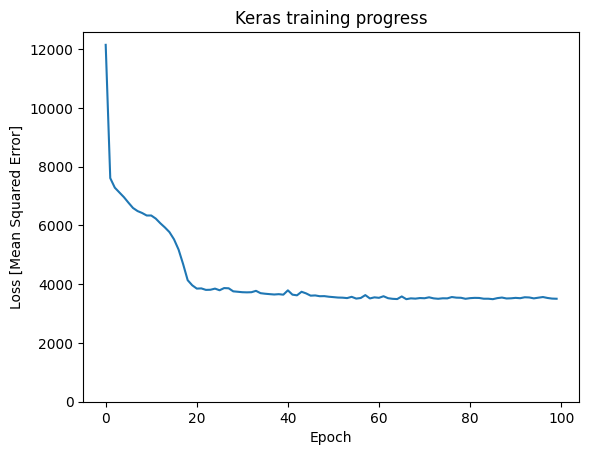

In [ ]:
plt.plot(history_i2.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
# Check the results of the insurance model
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 8ms/step - loss: 3190.1772 - mae: 3190.1772


[3190.17724609375, 3190.17724609375]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model3 = tf.keras.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train_tf.shape[1:]),
  keras.layers.Dense(1)
])

# Compile the model
insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
history_i3 = insurance_model3.fit(X_train_tf, y_train_tf, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8792.1768 - mae: 8792.1768
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7880.6460 - mae: 7880.6460
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7584.3154 - mae: 7584.3154
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7686.9956 - mae: 7686.9956
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.5005 - mae: 7671.5005
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7534.8564 - mae: 7534.8564
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7575.1665 - mae: 7575.1665
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7720.1270 - mae: 7720.1270
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.6250 - mae: 7551.6250
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.0259 - mae: 7674.0259

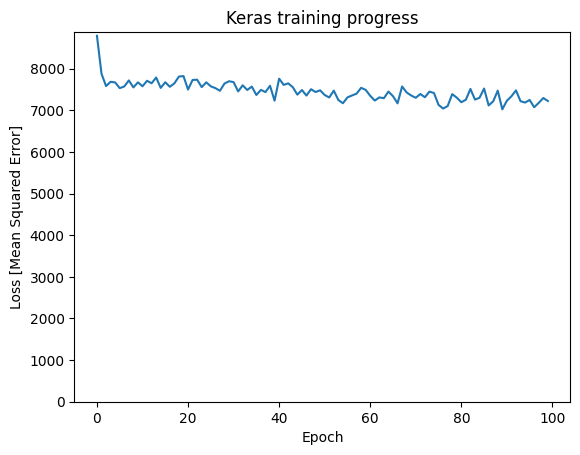

In [ ]:
plt.plot(history_i3.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

In [ ]:
# Check the results of the insurance model
insurance_model3.evaluate(X_train_tf, y_train_tf)

34/34 [==============================] - 0s 2ms/step - loss: 7516.7310 - mae: 7516.7310


[7516.73095703125, 7516.73095703125]